In [9]:
# without bootstrapping, do the Burke's regression with different model configurations and compare (also with runs with bs)
# includes runs with and without TC-effects

%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.gridspec as mgridspec
import numpy as np

import tc_cost.sourcedata.figs01 as sd_figs01
import tc_cost.plot.figs01 as pl_figs01
import tc_cost.util.constants as u_const
import tc_cost.util.data as u_data
import tc_cost.util.plot as u_plot
u_plot.main_setup_mpl(agg=False)

In [2]:
timehorizon = 8
temp_pred_vals = np.linspace(-3, 30.5, 100)
tc_pred_vals = np.arange(timehorizon + 1)
pred_vals = [temp_pred_vals, tc_pred_vals]

In [3]:
ds_all = sd_figs01.load_fitdata_all(timehorizon)
ds_bhm = ds_all["burke"]
bhm_countries = ds_bhm["ISO"].values
non_bhm_countries = np.setdiff1d(u_const.L_COUNTRIES, bhm_countries)

Loading cached GDP per capita data from /home/tovogt/code/tc_cost/data/cache/IHME_GLOBAL_GDP_ESTIMATES_1950_2015.nc ...
[hazem] Set missing BRB temperatures to TTO's temperatures...
[hazem] Set missing LCA temperatures to TTO's temperatures...
[hazem] Set missing TON temperatures to WSM's temperatures...
[hazem] Set missing HKG temperatures to VNM's temperatures...


In [4]:
print(len(bhm_countries), len(non_bhm_countries))
display(non_bhm_countries)

166 8


array(['BRB', 'HKG', 'JAM', 'LCA', 'MMR', 'NCL', 'TON', 'TWN'],
      dtype='<U3')

In [5]:
l_plotconfig = {
    "Original Figure S1": [
        ("bootstrap_ols_temp", (1961, 2010), True, "tab:blue"),
        ("bootstrap_ols_temp_notc", (1961, 2010), True, "tab:blue"),
        ("bootstrap_ols_temp", (1961, 2010), False, "tab:orange"),
        ("bootstrap_ols_temp_notc", (1961, 2010), False, "tab:orange"),
        ("bootstrap_ols_temp", None, False, "tab:green"),
        ("bootstrap_ols_temp_notc", None, False, "tab:green"),
        ("bootstrap_ols", None, False, "tab:purple"),
    ],
    f"Burke countries plus {', '.join(non_bhm_countries)}": [
        ("burke", None, False, "tab:blue"),
        ("burke_notc", None, False, "tab:blue"),
        ("gswp3-w5e5", (1961, 2010), False, "tab:orange"),
        ("gswp3-w5e5_notc", (1961, 2010), False, "tab:orange"),
        ("gswp3-w5e5", (1981, 2015), False, "tab:green"),
        ("notemp", (1981, 2015), False, "tab:green"),
        ("bootstrap_ols_temp", None, False, "black"),
        # ("gswp3-w5e5_legacy", (1961, 2010), False, "tab:red"),
        # ("gswp3-w5e5_legacy_notc", (1961, 2010), False, "tab:red"),
        # ("gswp3-w5e5_legacy", (1981, 2015), False, "tab:cyan"),
    ],
    "Only Burke countries": [
        ("notemp", (1981, 2015), True, "tab:green"),
        ("burke", None, True, "tab:blue"),
        ("burke_notc", None, True, "tab:blue"),
        ("gswp3-w5e5", (1961, 2010), True, "tab:orange"),
        ("gswp3-w5e5_notc", (1961, 2010), True, "tab:orange"),
        # ("gswp3-w5e5_legacy", (1961, 2010), True, "tab:red"),
        # ("gswp3-w5e5_legacy_notc", (1961, 2010), True, "tab:red"),
    ]
}

In [6]:
l_fitdata = {
    key: [
        (
            bs_scc.load_bhm_dmgfunc() if source == "ricke_bhm_notc"
            else sd_figs01.load_bootstrap_with_pred(
                timehorizon, temp_pred_vals,
                source.lstrip("bootstrap") + (
                    "" if period is None else f"_{period[0]}-{period[1]}"
                ) + ("_bhm" if bhm_ctry else "")
            ) if source.startswith("bootstrap")
            else ds_all[
                "gswp3-w5e5" if source == "notemp"
                else "burke" if source.startswith("burke")
                else source.rstrip("_notc")
            ]
        ) for source, period, bhm_ctry, color in values
    ] for key, values in l_plotconfig.items()

}

In [7]:
l_plotdata = {
    key: [
        sd_figs01.prepare_tdf_comparison(
            source, period, bhm_ctry, color,
            ds_fitdata=ds_fitdata,
            temp_pred_vals=temp_pred_vals,
            bhm_countries=bhm_countries,
        )
        for (source, period, bhm_ctry, color), ds_fitdata
        in zip(values, l_fitdata[key])
    ] for key, values in l_plotconfig.items()
}

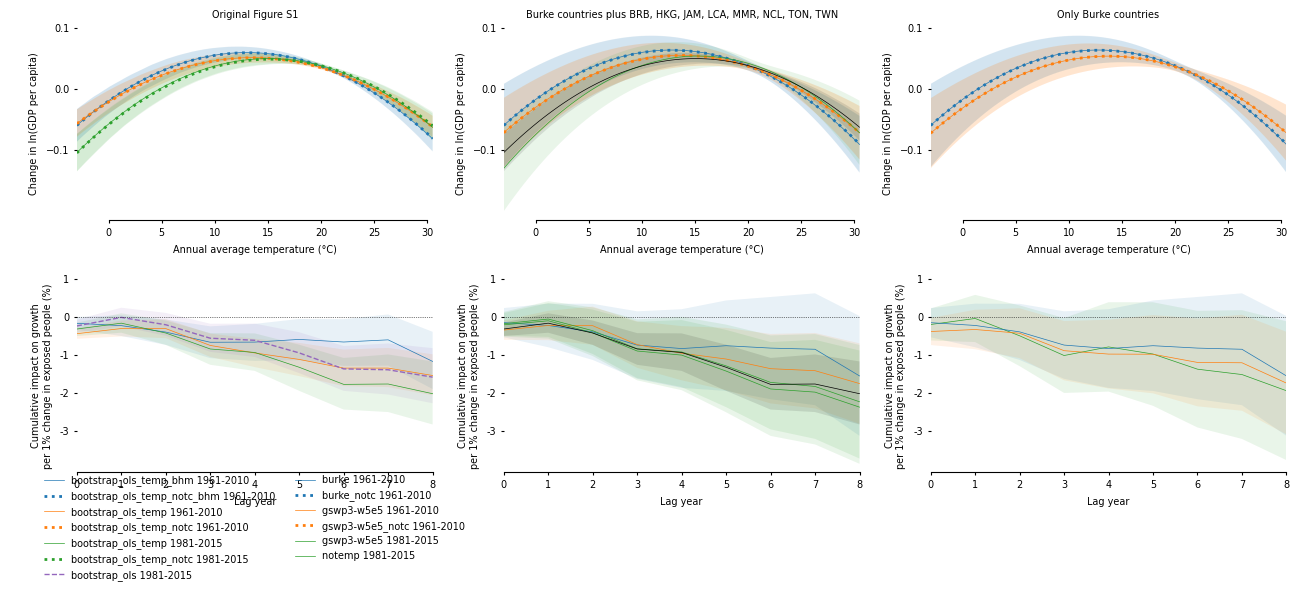

In [10]:
plt.close("all")
fig = plt.figure(figsize=(13, 6))
gs = mgridspec.GridSpec(1, 1)

pl_figs01.plot_tdf_comparison(gs[0], pred_vals, l_plotdata)

fig.tight_layout()